enter:20
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:0
enter:20
[[ 20.   0.   0.]
 [  0.   0.   0.]
 [  0.   0.  20.]]


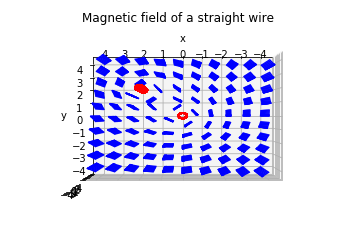

In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

x = np.linspace(-4,4,10)
y = np.linspace(-4,4,10)
z = np.linspace(-4,4,10)
x,y,z = np.meshgrid(x,y,z)
# 3d figure
fig = plt.figure()
ax = fig.gca(projection='3d')  #畫出3維的座標軸
def B(x,y,m,n):
    i = 1                                           #Amps in the wire
    mu = 1.26 * 10**(-6)                            #Magnetic constant    (H/m)                   
    mag = (mu/(2*np.pi))*(i/np.sqrt((x-m)**2+(y-n)**2)) #Magnitude of the vector B 磁場
    by = mag * (np.cos(np.arctan2(y-n,x-m)))            #By y方向磁場 arctan2(y,x)是反tan(x/y)
    bx = mag * (-np.sin(np.arctan2(y-n,x-m)))           #Bx x方向磁場
    bz = z*0                                        #Bz (zero, using the right-hand rule)
    return bx,by,bz

def cylinder(r,m,n):   #m,n是導線的位置
    phi = np.linspace(-np.pi,np.pi,100)
    x = m+r*np.cos(phi)
    y = n+r*np.sin(phi)
    return x,y
Bx=0
By=0
Bz=0

n = 3 
position = np.zeros([n, n]) # ([row, col])  #使用者輸入
for i in range(0,n):
    for j in range(0,n):
        position[i][j]= input("enter:")
print(position)

for i in range(0,n):
    for j in range(0,n):
        if position[i][j]==0:
            continue
        bx,by,bz = B(x,y,i,j)           #Magnetic field
        Bx=Bx+bx
        By=By+by
        Bz=Bz+bz
        cx,cy = cylinder(0.2,i,j)       #Wire
        for l in np.linspace(-4,4,800):  #-4到4是指線的長度    #Plot the wire
            ax.plot(cx,cy,l,label='Cylinder',color='r') 
            #ax.plot(x,y,z) 把一的點的座標畫出來 這裡是指從-4到4之間畫800個點
            
ax.quiver(x,y,z,Bx,By,Bz,color='b',length=0.5,normalize=True)  #畫向量 表示式為座標，分量...
plt.title('Magnetic field of a straight wire')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(elev=-90, azim=90)
plt.show()
